#### NOTE: V04_Backpropagation_Assignment (08 APR 2022 --- YADAV)

                                      APPLIED ROOTS VARIFICATION HAS TO BE DONE
                                                    -- YADAV(08 APR 2022)
                                                    
                



#### NOTE: V03_Backpropagation_Assignment (07 APR 2022 --- YADAV)

                            APPLIED ROOTS VARIFICATION HAS TO BE DONE
                                                    -- YADAV(07 APR 2022)
                                                    
                REMARKS: (APPLIED ROOTS -- 08 APRIL 2022)
                
                
                Hi, You did Nice Work :) but a few suggestions for you,

            1)For weight update in all optimizers do it dynamically (using for loops). Do not hard code to update each weight.

            2)Write observations for each optimizers

            please follow the above suggestions and resubmit your assignment :)

            Thank You :)

1. No changes made in V02.
2. V03 is for applied roots submission 
#### NOTE: V01_Backpropagation_Assignment (30 March 2022 --- YADAV)
                                                    
1. V01 has forward propation as well as backward propagation. In the backward propagation, again caluculated many steps, which are in the forward propagation. So, in the next version (V02), the excessive steps, which are in the backward propagation might be deleted.


# <font color='red'>Backpropagation</font>


In this assignment, you will implement Backpropagation from scratch. You will then verify the correctness of the your implementation using a "grader" function/cell (provided by us) which will match your implmentation.

The grader fucntion would help you validate the correctness of your code. 

Please submit the final Colab notebook in the classroom ONLY after you have verified your code using the grader function/cell.




## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

In [2]:

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [3]:
#print((X))

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

In [4]:
#print((y))

In [5]:
print(len(y))

506


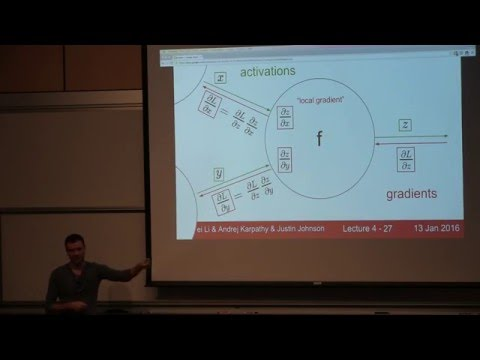

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [7]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    # write the code to compute the sigmoid value of z and return that value
    sig_z=(1/(1+np.exp(-z)))
    
    return sig_z

In [8]:
def grader_sigmoid(z):
    #if you have written the code correctly then the grader function will output true
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True

grader_sigmoid(2)

True

In [9]:
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # we are computing one of the values for better understanding
        
        
        #PART 1
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = np.exp(val_1) # PART 1 exp. calculation 
        
        #PART 2
        val_2 = w[6] + part_1 
        part_2 = np.tanh(val_2) #PART 2 tanh calculation
        #print("tanh: ",part_2)
        
        
        #PART 3
        val_3= w[2]*x[2] 
        val_4= w[3]*x[3]
        val_5= w[4]*x[4]
        
        lc_3=np.sin(val_3)
        lc_4_5= val_4 + val_5
        lc_6 = lc_3 * lc_4_5
        val_8= w[7] + lc_6
        part_3= sigmoid(val_8) # PART 3 sigmoid calculation
        #print("sigmoid: ",part_3)
        
        #PART 4 -- y_dash
        
        val_9 = w[8]* part_3
        part_4= val_9 + part_2 #PART 4
        y_dash = -2*(y-part_4) #Derivative of loss wrt y_pred
        #print("y_dash: ",y_dash)
        
        
        #Loss
        loss = np.square(y-part_4) #LOSS 
        #print("loss: ", loss)
        
        
        # after computing part1,part2 and part3 compute the value of y' from the main Computational graph using required equations
        # write code to compute the value of L=(y-y')^2 and store it in variable loss
        # compute derivative of L  w.r.to y' and store it in dy_pred 
        # Create a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
        # we will be using the dictionary to find values in backpropagation, you can add other keys in dictionary as well
        
        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['sigmoid'] =part_3
        forward_dict['tanh'] = part_2
        forward_dict['loss'] = loss
        forward_dict['dy_pred'] = y_dash
        
        return forward_dict


In [10]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)


True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

In [11]:
def backward_propagation(x,y,w,forward_dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    
      
        
    o_19= w[0] * x[0]
    o_17= w[1] * x[1]
    o_14= w[2] * x[2]
    o_12= w[3] * x[3]
    o_11= w[4] * x[4]
    
    o_10= o_11 + o_12
    o_13= np.sin(o_14)
    o_9= o_13 * o_10
    o_1= w[7] + o_9
    o_2= sigmoid(o_1)
    o_3=w[8] * o_2
    
    o_18= o_19 + o_17
    o_16= o_17 + o_19
    
    o_15= o_18*o_16
    o_8=w[5] + o_15
    
    o_7=np.exp(o_8)
    o_6=w[6] + o_7
    
    o_5=np.tanh(o_6)
    
    o_4= o_5 + o_3
    y_dash = -2*(y-o_4) #Derivative of loss wrt y_pred
    #print("y_dash: ",y_dash)


    #Loss
    loss = np.square(y-o_4) #LOSS 
    #print("loss: ", loss)
    
    
    #DIFFERENTATION
    dw1= y_dash * (1-math.pow(o_5,2))*o_7*2*x[0]*o_16
    #print("\n\ndw1 :", dw1)
    dw2= y_dash * (1-math.pow(o_5,2))*o_7*2*x[1]*o_16
    #print("dw2 :", dw2)
    dw3= y_dash * w[8] * sigmoid(o_1) * (1-sigmoid(o_1)) * np.cos(o_14) * x[2] * o_10
    #print("dw3 :", dw3)
    dw4= y_dash * w[8] * sigmoid(o_1) *o_13* (1-sigmoid(o_1)) * x[3]
    #print("dw4 :", dw4)
    dw5= y_dash * w[8] * sigmoid(o_1) *o_13* (1-sigmoid(o_1)) * x[4]
    #print("dw5 :", dw5)
    dw6= y_dash * (1-math.pow(o_5,2))*o_7
    #print("dw6 :", dw6)
    dw7= y_dash * (1-math.pow(o_5,2))
    #print("dw7 :", dw7)
    dw8= y_dash * w[8] * sigmoid(o_1) * (1-sigmoid(o_1))
    #print("dw8 :", dw8)
    dw9= y_dash * sigmoid(o_1)
    #print("dw9 :", dw9)
    
    
    #
    backward_dict={}
    backward_dict['dw1']= dw1
    backward_dict['dw2']= dw2
    backward_dict['dw3']= dw3
    backward_dict['dw4']= dw4
    backward_dict['dw5']= dw5
    backward_dict['dw6']= dw6
    backward_dict['dw7']= dw7
    backward_dict['dw8']= dw8
    backward_dict['dw9']= dw9
    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    
    
    return backward_dict

In [12]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
print("backward_dict: ",backward_dict)
grader_backprop(backward_dict)

backward_dict:  {'dw1': -0.22973323498702003, 'dw2': -0.02140761471775293, 'dw3': -0.005625405580266319, 'dw4': -0.004657941222712423, 'dw5': -0.0010077228498574246, 'dw6': -0.6334751873437471, 'dw7': -0.561941842854033, 'dw8': -0.04806288407316516, 'dw9': -1.0181044360187037}


True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

In [13]:
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    weight=w
    forward_dict=forward_propagation(x,y,w)
    #print("\nforward_dict: ", forward_dict)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    #print("\n\nbackward_dict: ", backward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list=list(backward_dict.values())
    # make sure that the order is correct i.e. first element in the list corresponds to  dw1 ,second element is dw2 etc.
    # you can use reverse function if the values are in reverse order
    #print("\n\noriginal_gradients_list: ", original_gradients_list)
    
    approx_gradients_list=[]
    #now we have to write code for approx gradients, here you have to make sure that you update only one weight at a time
    #write your code here and append the approximate gradient value for each weight in  approx_gradients_list
    
    for i in range(len(w)):
        #print("\n\ni:", i)
        
        w[i]= weight[i] + (2*eps) 
        #print( "\n\nl1  w[i]: ",w[i])
        l1=forward_propagation(x,y,w)
        loss1=l1['loss']
        #print("loss1: ", loss1)
        
        w[i]=weight[i]- (2*eps)
        #print( "l2  w[i]: ",w[i])
        l2=forward_propagation(x,y,w)
        loss2=l2["loss"]
        #print("loss2: ", loss2)
        
        aprox=(loss1-loss2)/(2*eps)
        #print("aprox: ", aprox)
        approx_gradients_list.append(aprox)
    #print(approx_gradients_list)
        
    
    
    #performing gradient check operation
    original_gradients_list=np.array(original_gradients_list)
    print("\n\noriginal_gradients_list: ", original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    print("\n\napprox_gradients_list: ", approx_gradients_list)
    gradient_check_value =(original_gradients_list-approx_gradients_list)/(original_gradients_list+approx_gradients_list)
    #print("\n\ngradient_check_value: ", gradient_check_value)
    
    
    return gradient_check_value
    

In [14]:
def grader_grad_check(value):
    print("\n\nchecking value throuh assertion: ",value)
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],y[0],w,eps)
#print("\n\nvalue: ", value)

grader_grad_check(value)



original_gradients_list:  [-1.16630512e-02 -1.08681753e-03  3.55201075e-06 -1.14905650e-05
 -2.48592766e-06 -9.03275801e-01 -9.02219254e-01 -7.04759100e-03
 -1.09954653e+00]


approx_gradients_list:  [-1.16633492e-02 -1.08681952e-03  3.55382390e-06 -1.14885879e-05
 -2.48467913e-06 -9.03275719e-01 -9.02219082e-01 -7.04759029e-03
 -1.09954648e+00]


checking value throuh assertion:  [-1.27728864e-05 -9.16707710e-07 -2.55164399e-04  8.60405080e-05
  2.51181965e-04  4.53604415e-08  9.56027526e-08  5.07577919e-08
  2.45398829e-08]


True

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Check below video for reference purpose**

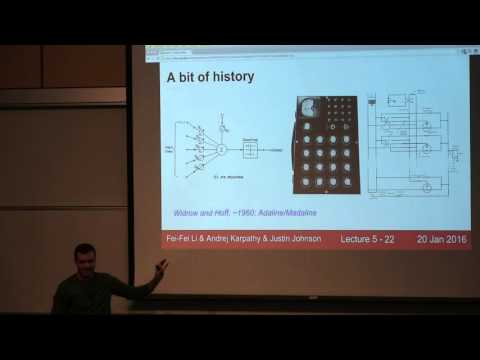

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights<br><br>


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [16]:
from sklearn.metrics import mean_squared_error 
epoch=20
neu=.001
mu, sigma = 0, 0.01 # mean and standard deviation
w = np.random.normal(mu, sigma, 9) # weight intialization
print("weights: ",w)

weights:  [ 0.00664667  0.00035001  0.00478925  0.00411992  0.00261141 -0.01247712
 -0.00305405 -0.02020101 -0.00055132]


In [17]:
# APPLIED ROOT REQUIREMENTS 

loss_value_vanilla=[]
epoch_vanilla=[]

for i in range(epoch):
    epoch_vanilla.append(i)
    
    y_pred=[]
    for j in range(len(data)):
        forward=forward_propagation(X[j], y[j], w)
        y_pred.append(forward['dy_pred']) # predicted value
        backward=backward_propagation(X[j],y[j],w,forward)
        
        loss_value_inside=[]
        for k in range(len(w)):
            #print(k)
            w[k]=w[k]- neu * backward['dw'+str(k+1)]
            
        loss_value_inside.append(forward['loss'])
    loss_value_vanilla.append(loss_value_inside)
    
    
print("loss_value_vanilla: ",loss_value_vanilla)
print("\n\n\nlen of loss_value_vanilla: ", len(loss_value_vanilla))

loss_value_vanilla:  [[0.233404293516523], [0.08159941559475903], [0.019575984079270668], [0.0010026168199990856], [0.002053854268988213], [0.009546177747545952], [0.01746722868784316], [0.02381017810223542], [0.028329784962174583], [0.03136098094783066], [0.03332557303779968], [0.034573390507330534], [0.035356189554388365], [0.0358433525236872], [0.03614478754432461], [0.03633034952607191], [0.03644389453519684], [0.03651275007196421], [0.03655386260283586], [0.03657770524516973]]



len of loss_value_vanilla:  20


### <font color='blue'> epoch vs loss </font>

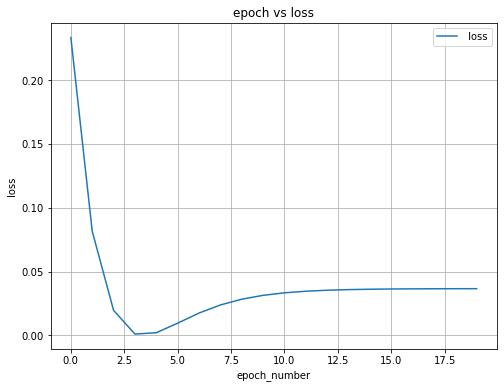

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoch_vanilla,loss_value_vanilla, label=' loss')
plt.title("epoch vs loss")
plt.xlabel("epoch_number")
plt.ylabel("loss")
plt.legend()

### OBSERVATION: 



### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [19]:
from sklearn.metrics import mean_squared_error 
epoch=20
neu=.001
m=np.zeros(9)
b=.9
mu, sigma = 0, 0.01 # mean and standard deviation
w = np.random.normal(mu, sigma, 9) # weight intialization

In [20]:
# APPLIED ROOT REQUIREMENTS 

loss_value_momentum=[]
epoch_momentum=[]

for i in range(epoch):
    #print(i)
    epoch_momentum.append(i)
    
    y_pred=[]
    for j in range(len(data)):
        #print(j)
        forward=forward_propagation(X[j], y[j], w)
        y_pred.append(forward['dy_pred']) # predicted value
        backward=backward_propagation(X[j],y[j],w,forward)
        
        loss_value_inside=[]
        for k in range(len(w)):
            #print(k)
            m[k]=b*m[k]+ (neu*backward['dw'+str(k+1)])
            w[k]=w[k]- m[k]
            
        loss_value_inside.append(forward['loss'])
    loss_value_momentum.append(loss_value_inside)
    
print("loss_value_momentum: ",loss_value_momentum)
print("\n\n\nlen of loss_value_momentum: ", len(loss_value_momentum))    

loss_value_momentum:  [[0.07169538861199258], [0.07858504428844337], [0.07841961918289544], [0.0777888262721928], [0.07578049093133067], [0.06997066944922009], [0.0569813622108942], [0.03884251049259803], [0.023695103353303795], [0.01419545262596878], [0.00867637109768504], [0.005471005322151483], [0.003567671341281003], [0.002403530599779174], [0.0016685327441724788], [0.0011896983956948216], [0.0008684172355471512], [0.0006470093194284121], [0.000490786769357978], [0.0003782860046441799]]



len of loss_value_momentum:  20


### <font color='blue'> epoch vs loss </font>

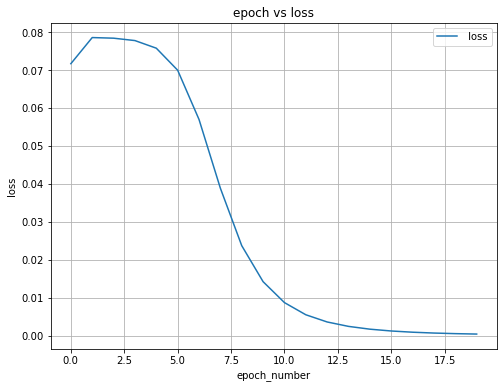

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoch_momentum,loss_value_momentum, label=' loss')
plt.title("epoch vs loss")
plt.xlabel("epoch_number")
plt.ylabel("loss")
plt.legend()

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [22]:
epoch=20
neu=.001
m=np.zeros(9)
v=np.zeros(9)
b1=.9
b2=0.999
eps=1e-9
mu, sigma = 0, 0.01 # mean and standard deviation
w = np.random.normal(mu, sigma, 9) # weight intialization

In [23]:
# APPLIED ROOT REQUIREMENTS 

loss_value_adam=[]
epoch_adam=[]

for i in range(epoch):
    epoch_adam.append(i)
    
    y_pred=[]
    for j in range(len(data)):
        
        forward=forward_propagation(X[j], y[j], w)
        y_pred.append(forward['dy_pred']) # predicted value
        #print(len(y_pred))
        backward=backward_propagation(X[j],y[j],w,forward)
        
        loss_value_inside=[]
        for k in range(len(w)):
            m[k]=(b1*m[k]) + ((1-b1)*backward['dw'+str(k+1)])
            mt=m[k]/(1-b1)
            v[k]=(b2*v[k]) + ((1-b2)*math.pow(backward['dw'+str(k+1)],2))
            vt=v[k]/(1-b2)
            w[k]=w[k]-(neu/(math.sqrt(vt)+eps))*mt
            
        loss_value_inside.append(forward['loss']) 
    loss_value_adam.append(loss_value_inside)

print("loss_value_adam: ",loss_value_adam)
print("\n\n\nlen of loss_value_adam: ", len(loss_value_adam))

loss_value_adam:  [[0.18926567342083964], [0.08310547746316208], [0.033697097220617034], [0.011058406235223315], [0.0023871523517974298], [0.0001719830043699898], [1.904607026262844e-05], [6.465606273648009e-05], [1.384076419937127e-05], [1.2493540076928553e-05], [0.00011239313045096862], [0.0002570523079605077], [0.00037409566088864043], [0.00042421156381045787], [0.0004093887780316258], [0.0003547951354997027], [0.0002861203261153023], [0.00021949283409534358], [0.0001624878035060046], [0.00011765136073256436]]



len of loss_value_adam:  20


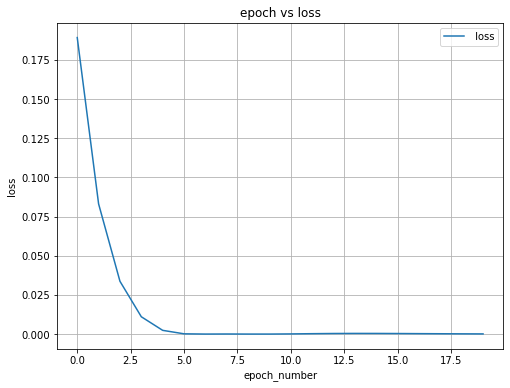

In [24]:


%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoch_adam,loss_value_adam, label=' loss')
plt.title("epoch vs loss")
plt.xlabel("epoch_number")
plt.ylabel("loss")
plt.legend()



<font color='blue'>Comparision plot between epochs and loss with different optimizers. Make sure that loss is conerging with increaing epochs</font>

In [25]:
#plot the graph between loss vs epochs for all 3 optimizers.

<font color='blue'><b>You can go through the following blog to understand the implementation of other optimizers .</font>
   <br> [Gradients update blog](https://cs231n.github.io/neural-networks-3/) </br>

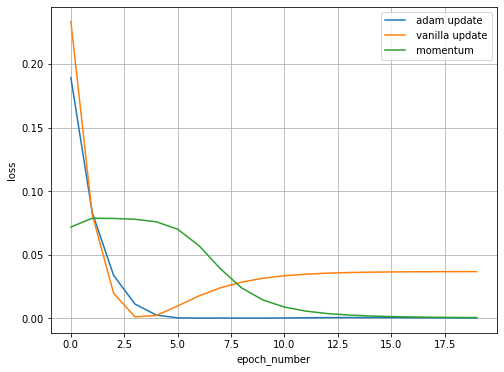

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoch_adam,loss_value_adam, label=' adam update')
plt.plot(epoch_vanilla,loss_value_vanilla, label=' vanilla update')
plt.plot(epoch_momentum,loss_value_momentum, label=' momentum')
plt.xlabel("epoch_number")
plt.ylabel("loss")
plt.legend()

### OBSERVATIONS: 

From the 3 optimizers, 
1. the adam is coverging faster, because adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
2. Vanilla optimizer converges faster than adam, however, after few epoch at epoch 3, the convergence changes it's due to several passes can be made over the training. 
3. SGD with momentum optimizer accelerate gradients vectors in the right directions, thus leading to faster converging, it's because exponetial weighting to denoise SGD gradient. Which is the reason, at epoch 5, its start converging and reaches to optimum at epoch 12. 

Conclusion:
Over all adam optimizer is the best, since it converges faster than other optimizers. 